## Problem Statement

An e-commerce business collects a large amount of customer and transaction data, but it is not able to clearly understand customer behavior or use this data to make effective business decisions. The business struggles to identify valuable customers, customers who may stop purchasing, and which actions should be taken to improve customer retention and revenue.

## Business Decisions Supported by the System

- The business should be able to identify high-value customers based on their purchasing behavior.
- The business should be able to detect customers who are at risk of leaving or reducing their spending.
- The business should be able to decide which customer segments should receive targeted offers or retention strategies.


In [1]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data1/onlineretailbds.xlsx")

In [3]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(6865)

In [8]:
df = df.dropna(subset=["Customer ID"])
df = df[~df["Invoice"].astype(str).str.startswith("C")]

In [9]:
df = df[(df["Quantity"]>0) & (df["Price"]>0)]

In [10]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [11]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.840747,NaN,34.757965,1679.762138,77.150058


Exploratory Data Analysis 

In [12]:
df["Customer ID"].nunique()

4312

In [13]:
df["Invoice"].nunique()

19213

In [14]:
df["Revenue"].sum()

np.float64(8832003.274000002)

In [15]:
df["Revenue"].describe()

count    407664.000000
mean         21.664909
std          77.150058
min           0.001000
25%           4.950000
50%          11.900000
75%          19.500000
max       15818.400000
Name: Revenue, dtype: float64

In [16]:
df["InvoiceData"] = pd.to_datetime(df["InvoiceDate"])

In [17]:
df["Month"]  = df["InvoiceDate"].dt.to_period("M")

monthly_revenue = df.groupby("Month")["Revenue"].sum()
monthly_revenue.head()


Month
2009-12    686654.160
2010-01    557319.062
2010-02    506371.066
2010-03    699608.991
2010-04    594609.192
Freq: M, Name: Revenue, dtype: float64

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

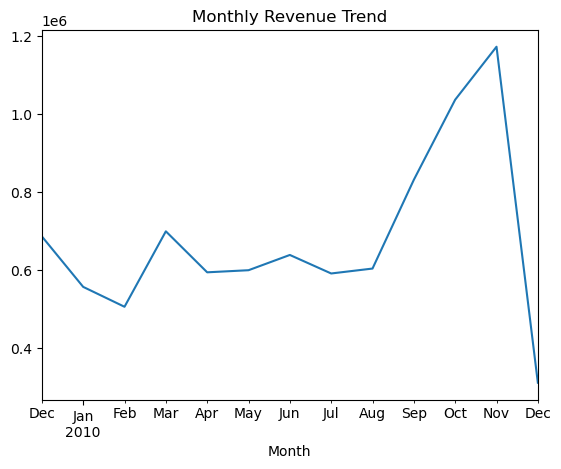

In [18]:
monthly_revenue.plot(kind="line", title="Monthly Revenue Trend")

In [19]:
orders_per_customer = df.groupby('Customer ID')["Invoice"].nunique()
orders_per_customer.describe()

count    4312.000000
mean        4.455705
std         8.170213
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Invoice, dtype: float64

In [20]:
revenue_per_customer = df.groupby("Customer ID")["Revenue"].sum()
revenue_per_customer.describe()


count      4312.000000
mean       2048.238236
std        8914.481280
min           2.950000
25%         307.987500
50%         706.020000
75%        1723.142500
max      349164.350000
Name: Revenue, dtype: float64

In [21]:
df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(5)


Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Name: Revenue, dtype: float64

## Key EDA Insights

- The dataset contains around 4,300 customers and over 19,000 transactions, indicating repeat purchasing behavior.
- Revenue distribution is highly skewed, with most transactions having low value while a few transactions contribute very high revenue.
- Monthly revenue peaks in November and drops in December, likely due to seasonal effects or incomplete end-of-year data.
- Customer behavior varies significantly, with a small number of customers placing a very high number of orders and contributing disproportionately to total revenue.
- Revenue is heavily concentrated in the United Kingdom, suggesting the business primarily operates in the UK market.


In [22]:
snapshot_date = df["InvoiceDate"].max() +pd.Timedelta(days=1)
snapshot_date

Timestamp('2010-12-10 20:01:00')

In [23]:
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice":"nunique",
    "Revenue": "sum"
})

In [24]:
rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


In [25]:
rfm = rfm.rename(columns={
    "InvoiceDate": "Recency",
    "Invoice": "Frequency",
    "Revenue": "Monetary"
})


In [26]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [27]:
rfm.describe()

,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000
mean,91.171846,4.455705,2048.238236
std,96.860633,8.170213,8914.481280
min,1.000000,1.000000,2.950000
25%,18.000000,1.000000,307.987500
50%,53.000000,2.000000,706.020000
75%,136.000000,5.000000,1723.142500
max,374.000000,205.000000,349164.350000


In [28]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])

rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4]
)

rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])


In [29]:
rfm["R_Score"] = rfm["R_Score"].astype(int)
rfm["F_Score"] = rfm["F_Score"].astype(int)
rfm["M_Score"] = rfm["M_Score"].astype(int)


In [30]:
rfm["RFM_Score"] = (
    rfm["R_Score"].astype(str) +
    rfm["F_Score"].astype(str) +
    rfm["M_Score"].astype(str)
)


In [31]:
rfm["Segment"] = rfm["RFM_Score"].replace({
    r"[4][4][4]": "Champions",
    r"[3-4][3-4][3-4]": "Loyal",
    r"[1-2][1-2][1-2]": "Lost"
}, regex=True)


## RFM Segmentation Insights:
📊 Day 4 – RFM Insights

Monetary distribution is highly skewed — a small group of customers contributes a large portion of total revenue (Pareto effect).

Customers with low Recency are active and engaged, while high Recency customers indicate churn risk.

Frequency analysis shows a clear separation between loyal repeat buyers and low-engagement customers.

RFM segmentation identifies key groups such as Champions, Loyal, At-Risk, and Lost customers.

These segments enable targeted strategies like retention campaigns, loyalty rewards, and reactivation offers.

Conclusion:
RFM analysis helps transform raw transaction data into actionable customer intelligence, enabling data-driven marketing and business decisions.


In [32]:
rfm.columns.tolist()

['Recency',
 'Frequency',
 'Monetary',
 'R_Score',
 'F_Score',
 'M_Score',
 'RFM_Score',
 'Segment']

In [33]:
rfm["Segment"].value_counts()

Segment
Lost         1212
Loyal         830
Champions     458
233           158
322           124
311           116
244           114
312            80
321            78
232            77
332            77
133            76
223            75
432            73
234            71
422            71
323            58
123            52
132            51
411            50
421            47
243            43
113            29
423            27
213            26
412            24
131            21
134            20
313            19
144            18
224            16
124            14
143            14
342            11
324            10
231             9
442             9
431             8
114             7
413             6
214             6
424             5
142             5
331             5
242             4
241             3
414             2
314             2
141             1
Name: count, dtype: int64

In [34]:
rfm["Segment"].value_counts(normalize=True)*100

Segment
Lost         28.107607
Loyal        19.248609
Champions    10.621521
233           3.664193
322           2.875696
311           2.690167
244           2.643785
312           1.855288
321           1.808905
232           1.785714
332           1.785714
133           1.762523
223           1.739332
432           1.692950
234           1.646568
422           1.646568
323           1.345083
123           1.205937
132           1.182746
411           1.159555
421           1.089981
243           0.997217
113           0.672542
423           0.626160
213           0.602968
412           0.556586
131           0.487013
134           0.463822
313           0.440631
144           0.417440
224           0.371058
124           0.324675
143           0.324675
342           0.255102
324           0.231911
231           0.208720
442           0.208720
431           0.185529
114           0.162338
413           0.139147
214           0.139147
424           0.115955
142           0.115955
331

In [35]:
rfm.groupby("Segment")["Monetary"].sum().sort_values(ascending=False)

Segment
Champions    4475595.843
Loyal        1925771.675
244           483707.571
Lost          340806.842
234           216692.130
233           180039.460
134            98208.730
133            86399.950
144            84395.540
223            72561.770
323            62503.330
124            61294.690
322            60660.350
123            53139.310
243            52683.770
232            40474.070
332            39975.041
324            39170.960
432            38306.120
224            35371.670
422            35114.800
312            34328.570
113            29316.200
423            28081.730
114            27549.412
213            26642.800
132            25409.100
214            24715.900
311            21285.520
313            18724.050
143            18228.210
321            16020.250
424            10426.960
412             9572.430
421             9252.600
411             9074.190
342             5881.360
413             5527.640
442             5398.880
414             4

In [36]:
rfm.groupby("Segment")[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
Segment,,,
113,238.000000,1.000000,1010.903448
114,260.571429,1.000000,3935.630286
123,216.788462,1.923077,1021.909808
124,219.285714,1.785714,4378.192143
131,205.333333,2.619048,196.930000
132,224.137255,2.941176,498.217647
133,192.157895,3.381579,1136.841447
134,187.400000,3.700000,4910.436500
141,298.000000,8.000000,181.350000


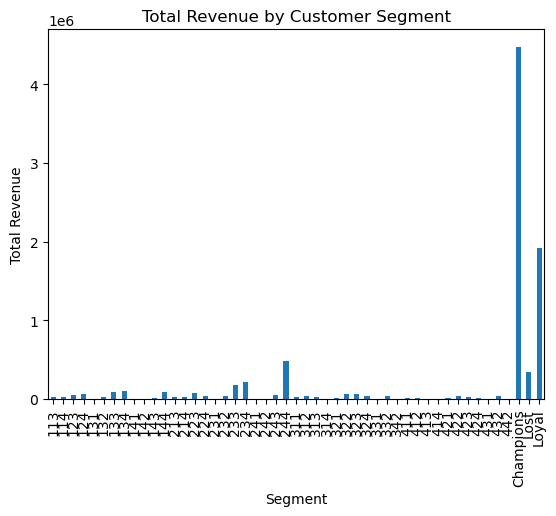

In [37]:
rfm.groupby("Segment")["Monetary"].sum().plot(kind="bar")
plt.title("Total Revenue by Customer Segment")
plt.ylabel("Total Revenue")
plt.show()



day 5: 
Business Recommendations Based on RFM
Champions: Provide VIP rewards, exclusive offers, and retention benefits to maintain high engagement and revenue contribution.
Loyal Customers: Introduce cross-selling and upselling strategies to increase their spending and convert them into Champions.
Lost Customers: Use low-cost reactivation campaigns such as discount emails or limited-time offers. Avoid heavy marketing spend on this group.
Focus marketing budget more on high-value segments rather than treating all customers equally.

📊 Revenue Concentration Insight

Revenue is highly concentrated in the Champions segment, indicating a Pareto-like distribution where a small group of customers drives a significant portion of total revenue.

This highlights the importance of customer retention strategies for high-value segments.

In [38]:
total_revenue = rfm["Monetary"].sum()
total_revenue

np.float64(8832003.274)

In [39]:
top_10_sum = rfm.sort_values(by="Monetary",ascending=False).head(10)["Monetary"]
(top_10_sum / total_revenue)*100

Customer ID
18102.0    3.953399
14646.0    2.812459
14156.0    2.225619
14911.0    1.722685
13694.0    1.488260
17511.0    0.957214
15061.0    0.942984
16684.0    0.911336
16754.0    0.741622
17949.0    0.680679
Name: Monetary, dtype: float64

In [40]:
top_10_sum = (
    rfm.sort_values(by="Monetary", ascending=False)
       .head(10)["Monetary"]
       .sum()
)

top_10_sum


np.float64(1451650.78)

In [41]:
(top_10_sum / total_revenue) * 100


np.float64(16.436257267628363)

In [42]:
champion_sum = rfm[rfm["Segment"] == "Champions"]["Monetary"].sum()
(champion_sum / total_revenue)*100

np.float64(50.67475298809542)